This pipeline opens the result of ICAalamelodic.m, lets the user interactively label the components that look like neuronal activity (rather than movement artefacts or noise), sort them by label, plots a final summary for the chosen components, and save the reordered maps and time series.

In [1]:
clear all

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
%matplotlib inline 
import pylab

Open time series

In [3]:
import scipy.io as sio

In [4]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/100250/100250ss2oncdFF20spsfkf50Smith0_4_60TS.mat


In [5]:
Ua=sio.loadmat(filename)

In [6]:
DT=Ua['TSo']

In [7]:
DT.shape

(274, 50)

In [8]:
S1=DT.shape

In [9]:
DTmean=np.zeros(S1)
DTvar=np.zeros(S1)
Var=np.zeros(S1[1])

In [10]:
for i in range(S1[1]):
    DTmean[:,i]=DT[:,i]-np.mean(DT[:,i],0)

In [11]:
for i in range(S1[1]):
    Var[i]=np.sqrt(np.var(DTmean[:,i]))
    DTvar[:,i]=DTmean[:,i]/Var[i]

In [12]:
DTvar.shape

(274, 50)

open maps

In [13]:
from nifti import NiftiImage

In [14]:
import nibabel as nb

In [15]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/100250/100250ss2oncdFF20spsfkf50Smith0_4_60IC.nii


In [16]:
img1 = nb.load(filename2)

In [17]:
data = img1.get_data()

In [18]:
S=data.shape

In [19]:
S

(161, 122, 11, 50)

# Zscore maps

In [20]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

Transform the maps to have zero mean

In [21]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

Transform the maps to have unit variance and zscore

In [22]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
Dmaps[Dmaps<0]=0

Order ICs by variance

In [23]:
datao=data
Dmapso=Dmaps

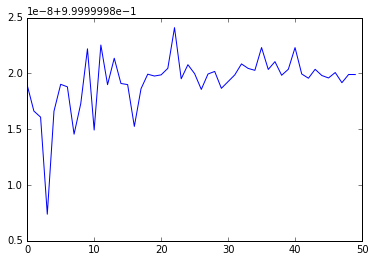

In [24]:
plt.plot(Var)

#Separate maps in substacks, sort the independent components by brain regions 

In [25]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (13, 2.5)

In [26]:
Dtemp=data[:,:,:,0]

In [27]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [28]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=Dtemp[:,:,range(Nstack)]
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        #Dmean[:,:,i]=np.max(Vmean,0)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

/usr/local/lib/python2.7/dist-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


In [29]:
DTvar.shape

(274, 50)

In [30]:
S

(161, 122, 11, 50)

0


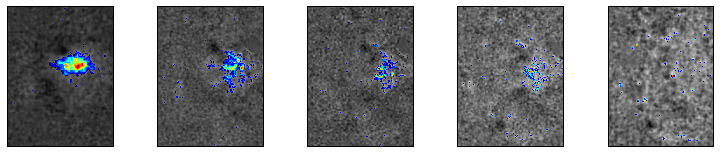

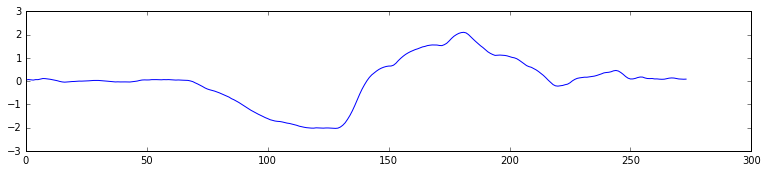

a
1


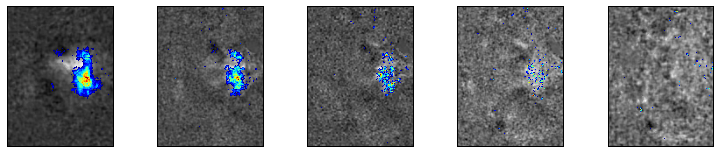

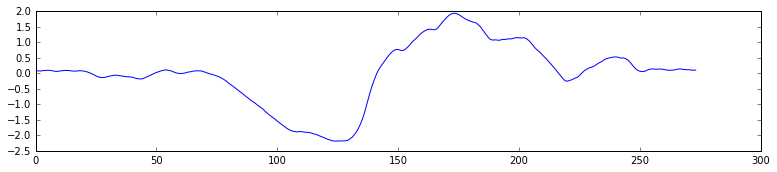

a
2


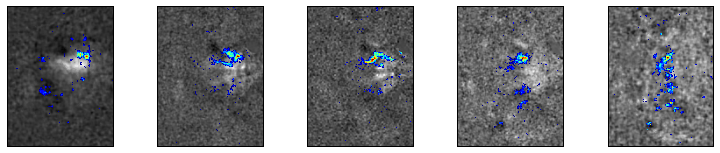

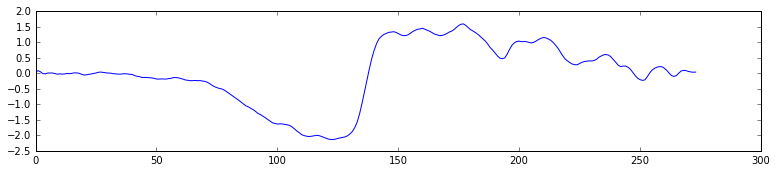

a
3


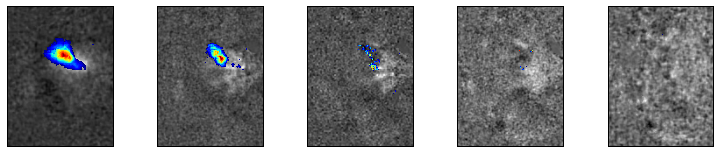

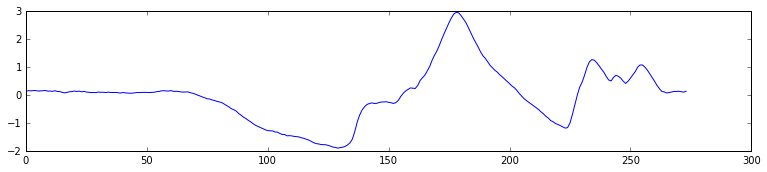

a
4


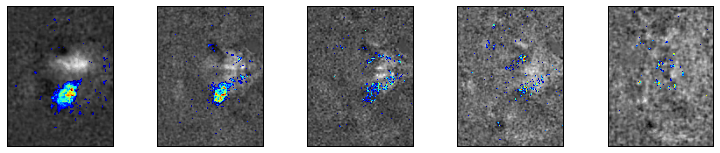

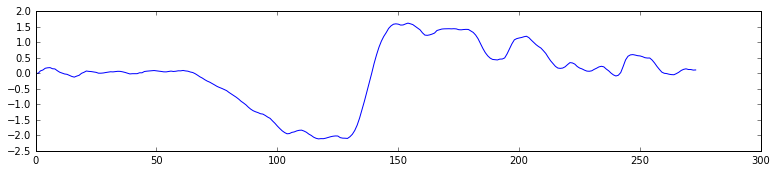

a
5


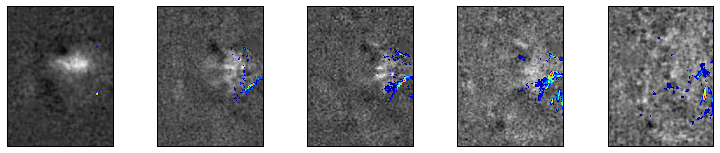

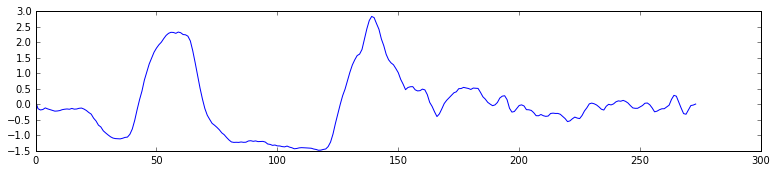

a
6


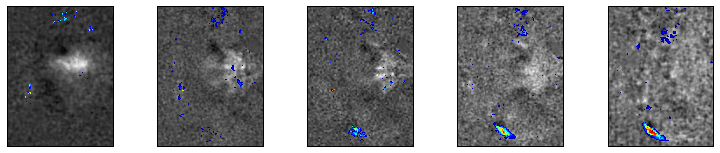

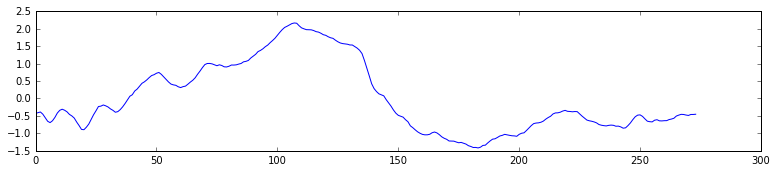

a
7


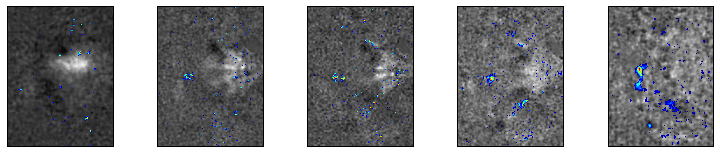

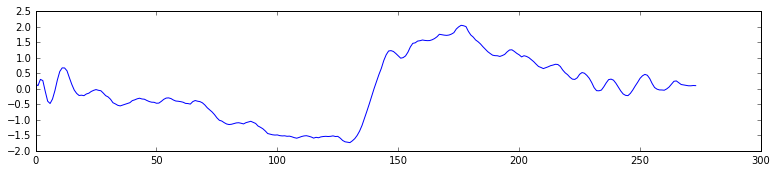

a
8


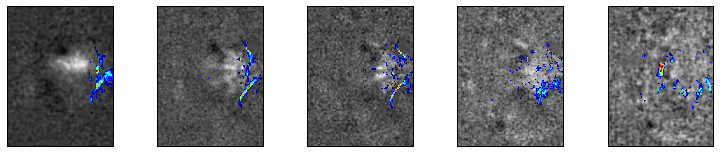

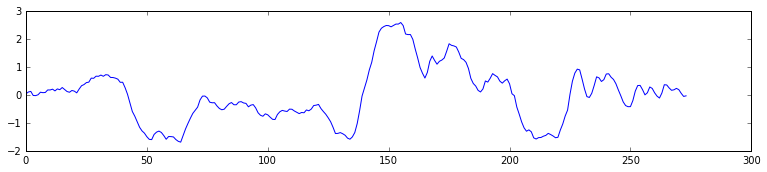

a
9


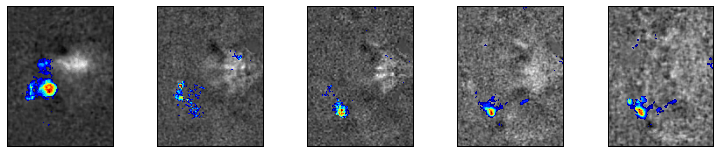

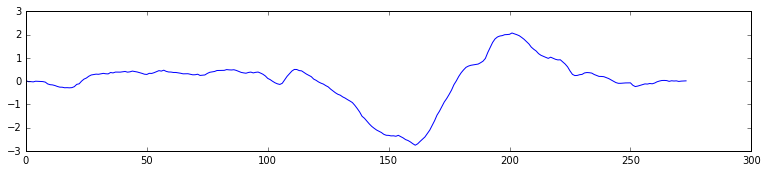

a
10


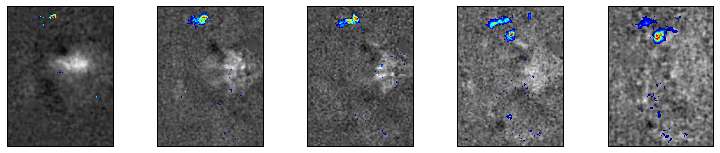

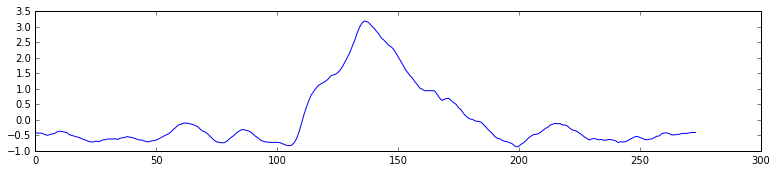


11


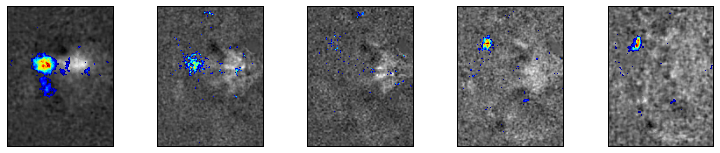

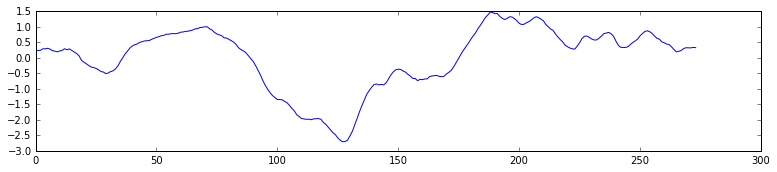

a
12


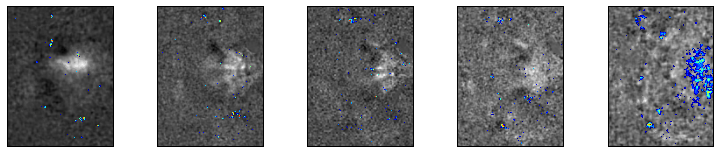

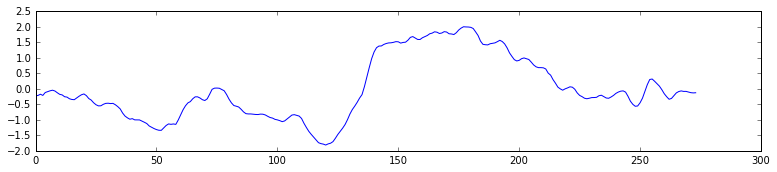


13


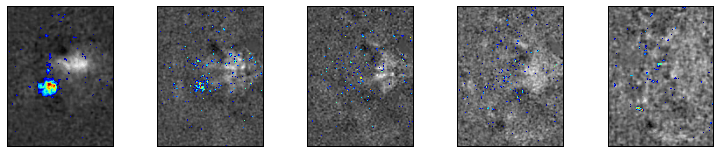

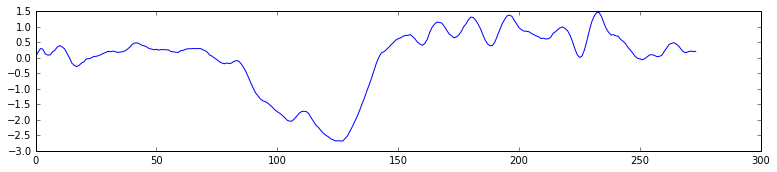

a
14


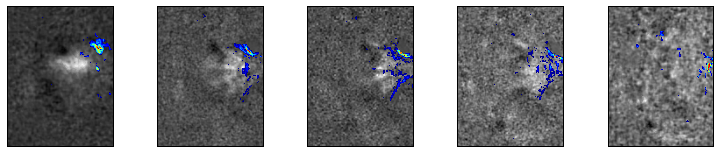

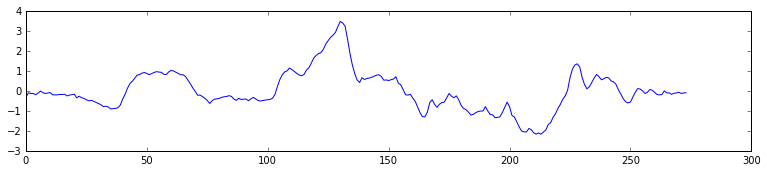

a
15


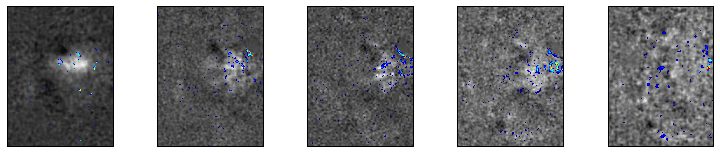

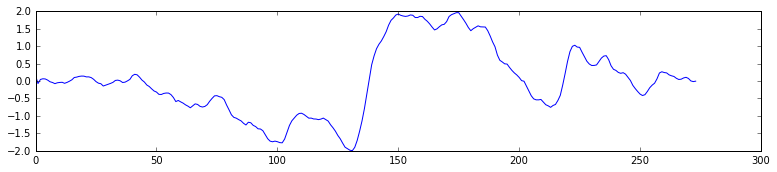

a
16


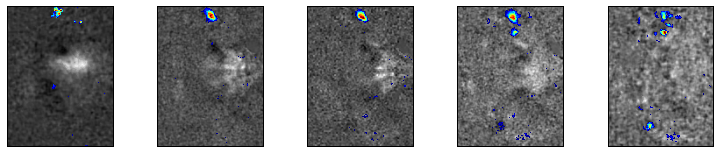

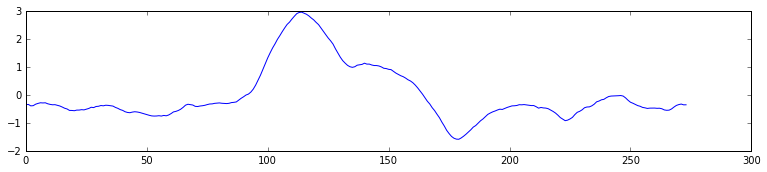


17


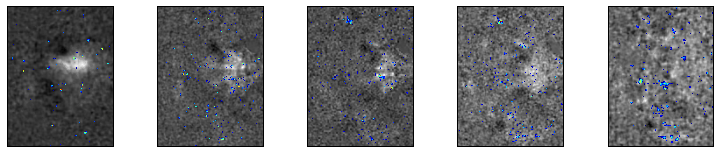

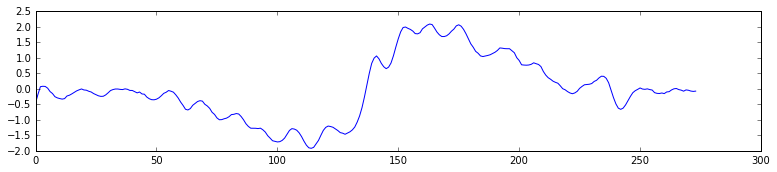


18


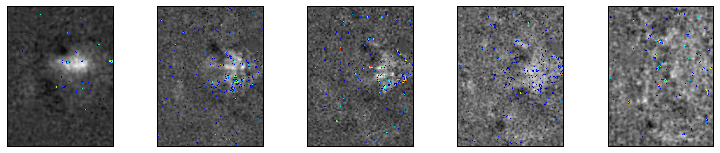

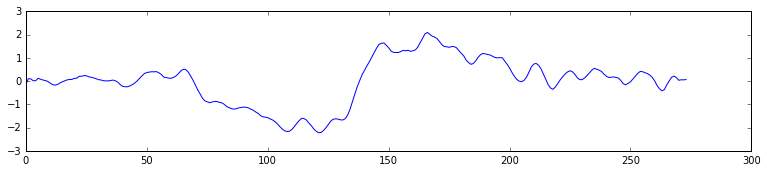


19


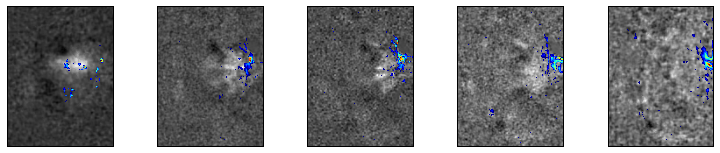

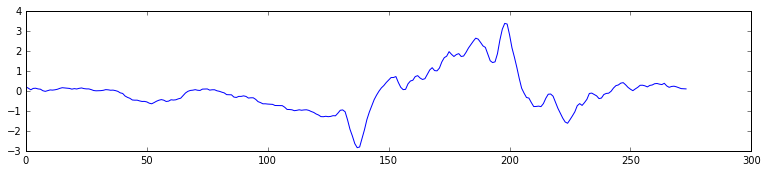

a
20


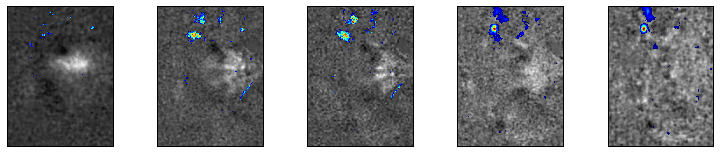

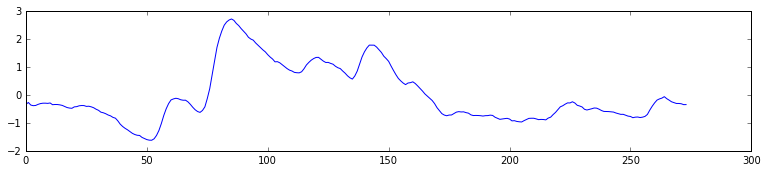


21


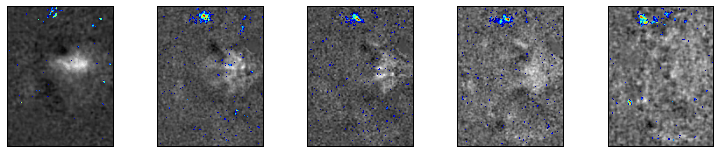

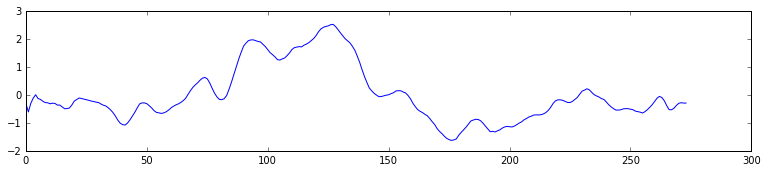


22


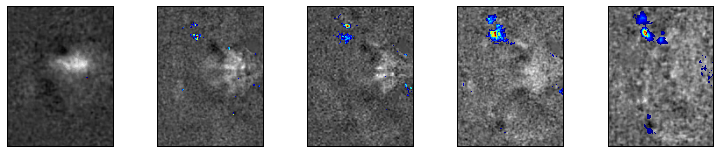

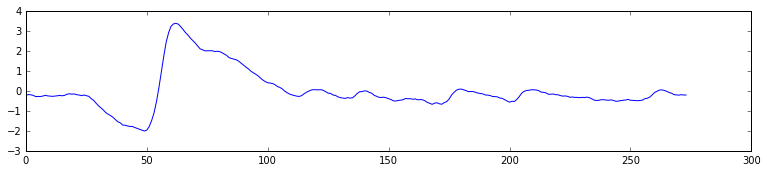


23


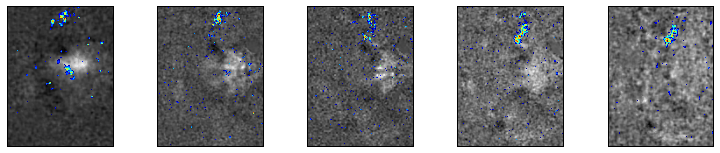

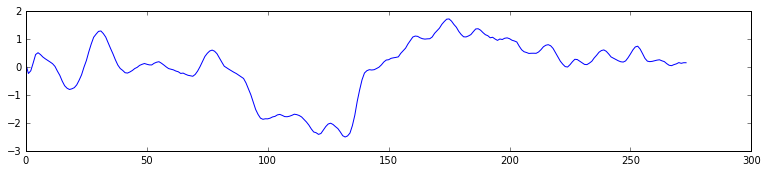


24


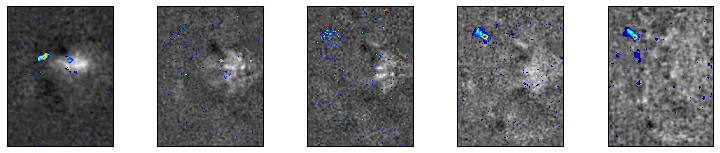

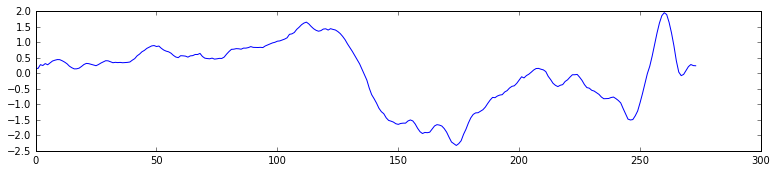

a
25


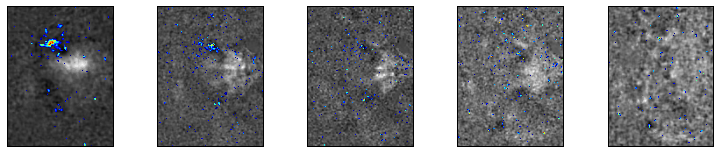

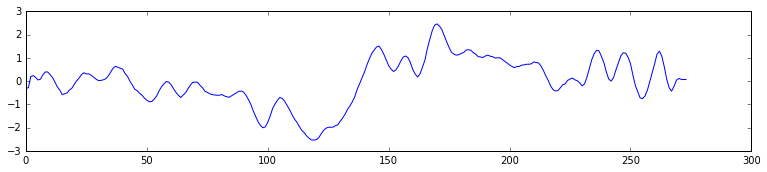

a
26


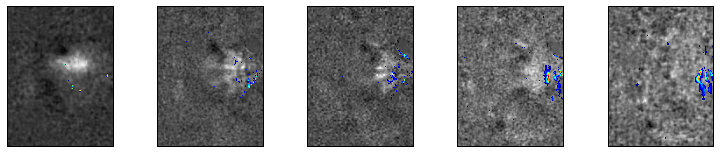

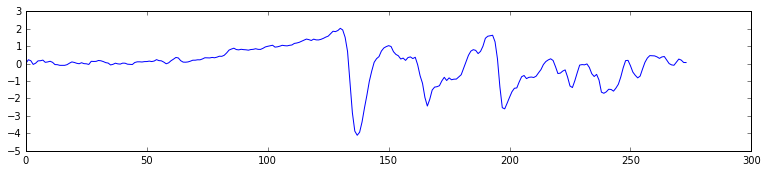

a
27


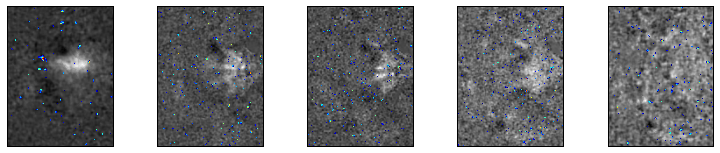

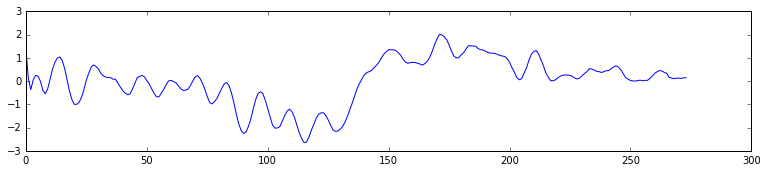


28


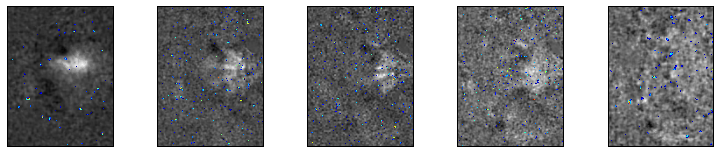

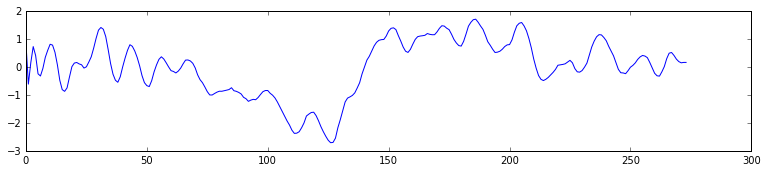


29


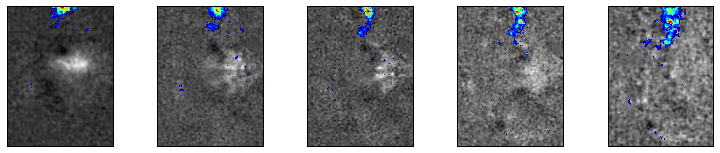

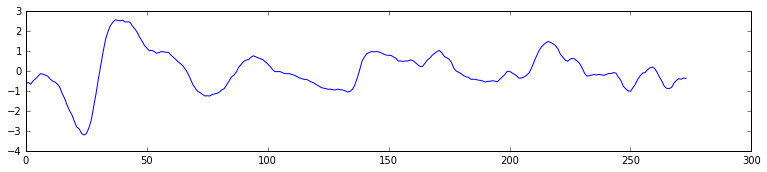


30


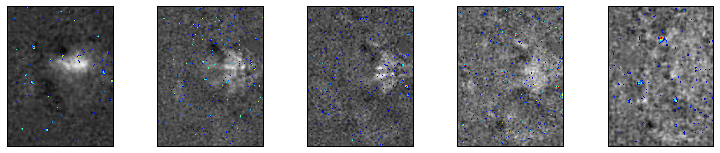

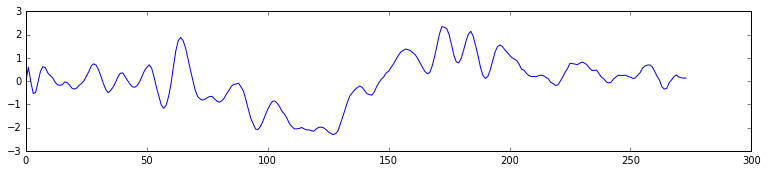


31


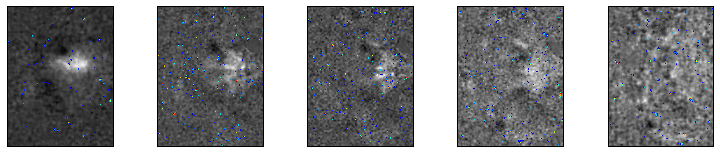

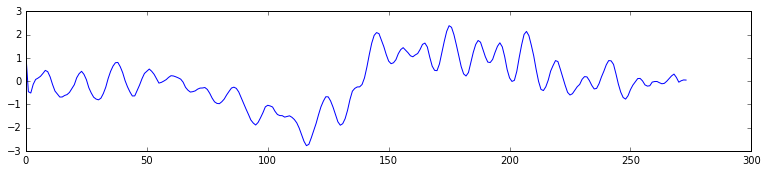


32


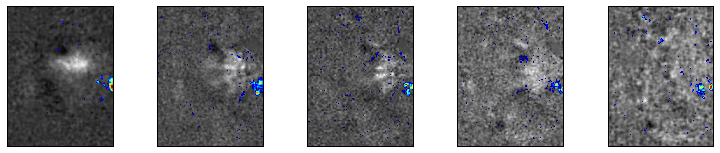

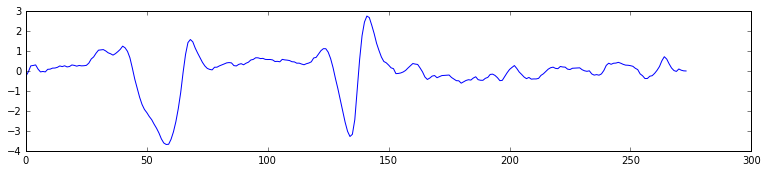


33


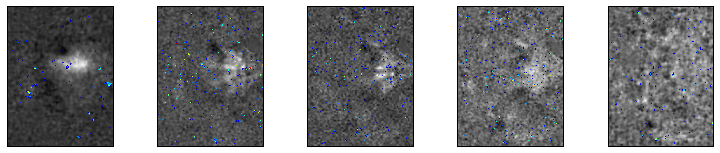

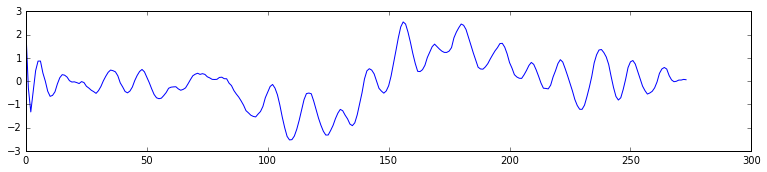


34


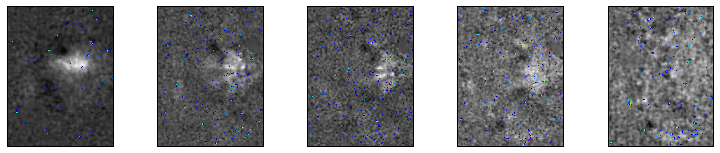

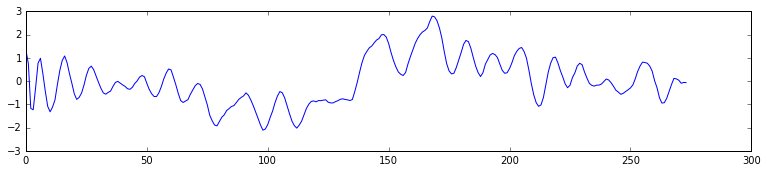


35


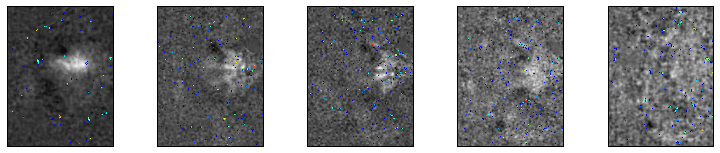

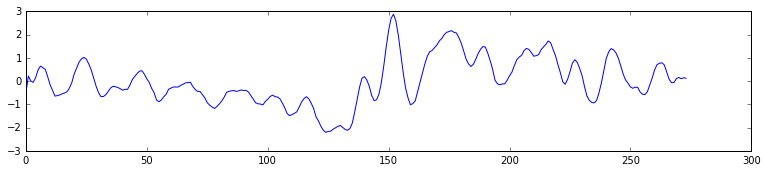


36


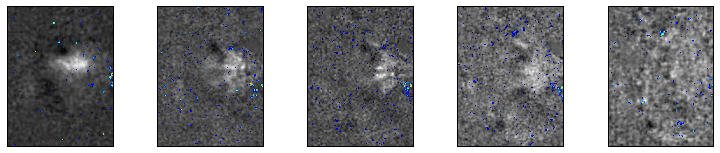

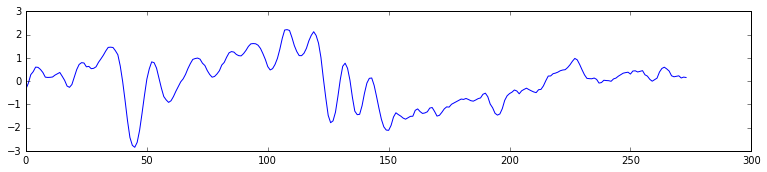


37


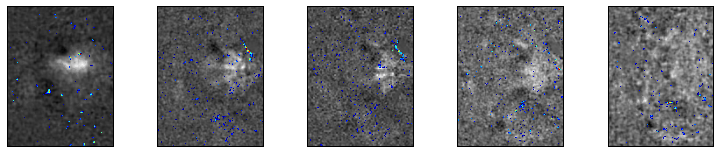

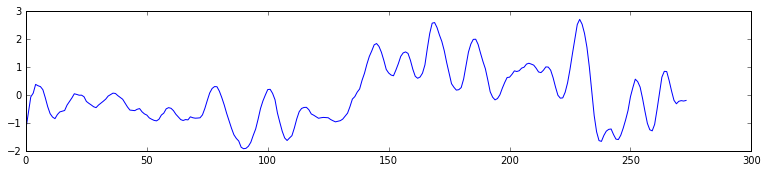

a
38


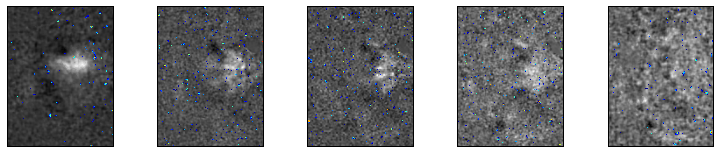

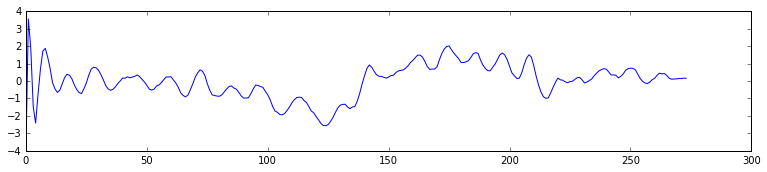


39


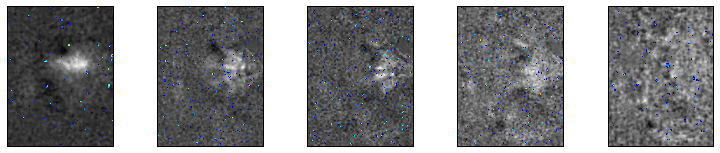

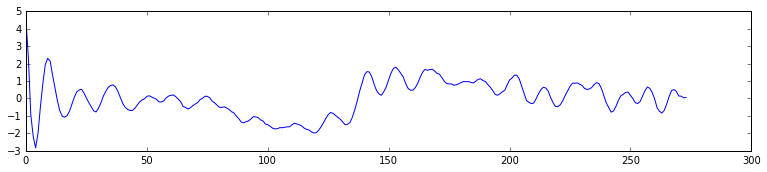


40


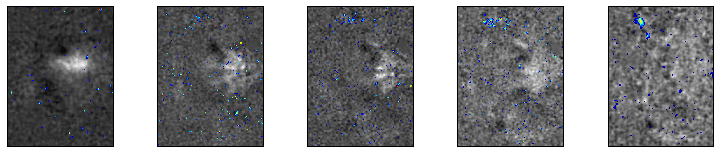

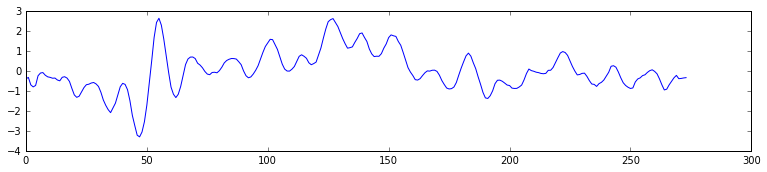


41


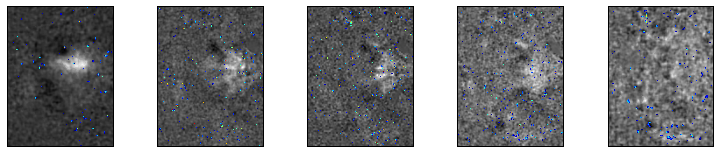

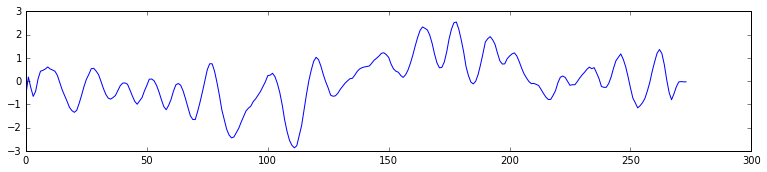


42


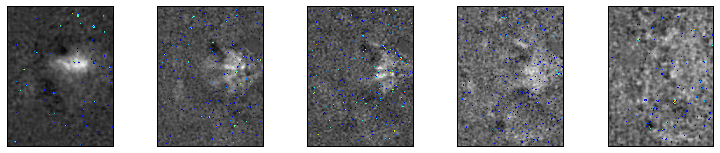

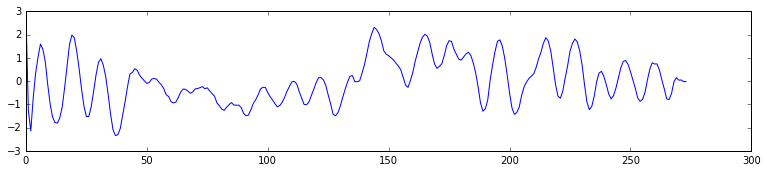


43


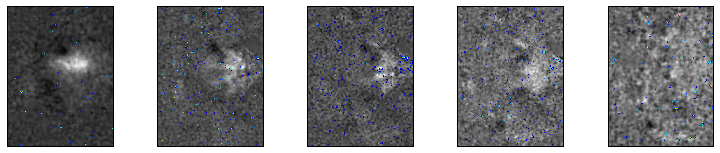

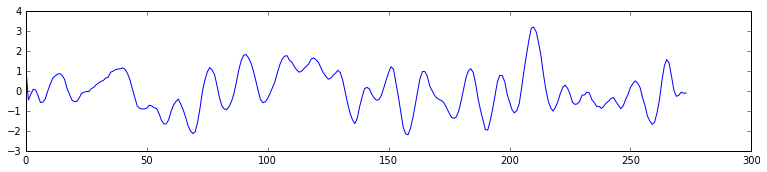


44


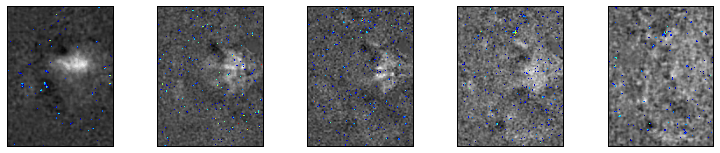

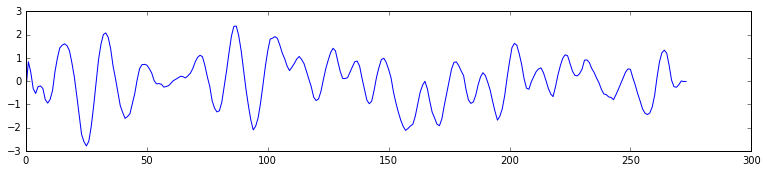


45


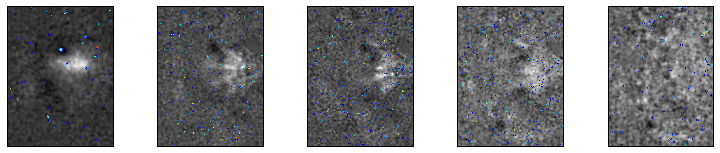

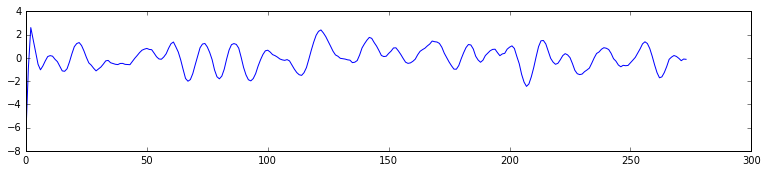


46


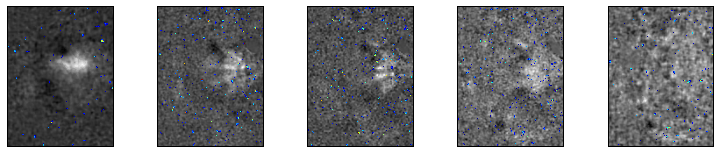

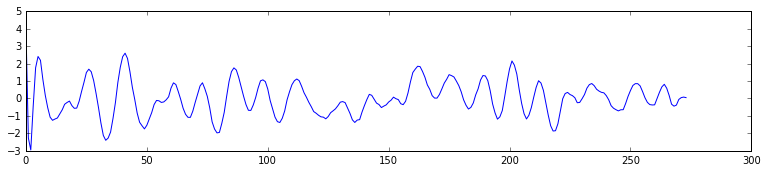


47


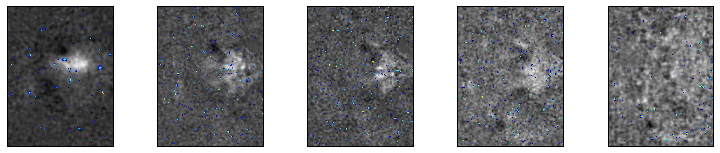

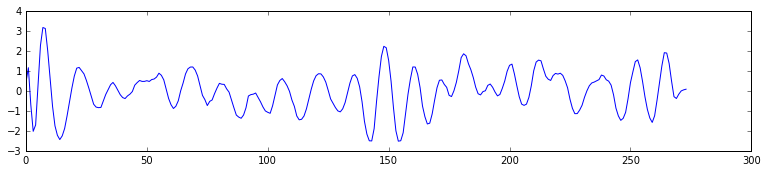


48


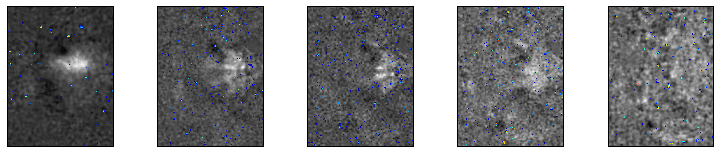

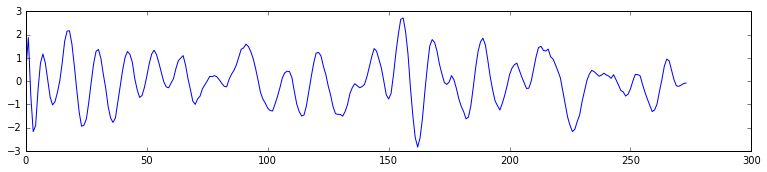


49


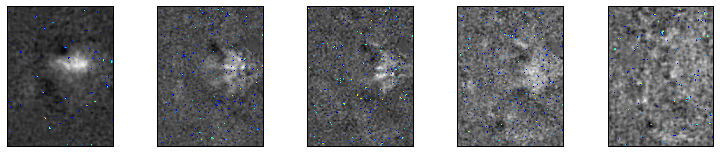

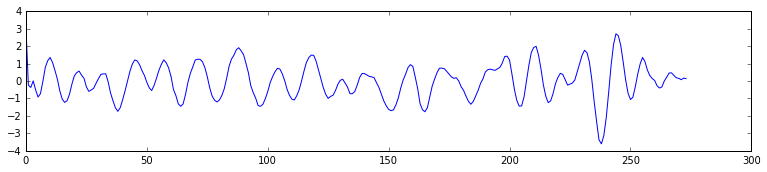

In [31]:
for j in range(S[3]):

    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,j]
            D1[:,:,i]=V 
            

    print(j)
    for i in range(Nstack):
        plt.subplot(1,5,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    plt.show()
    
   # plt.plot(TS_ROI[Order[j],:])
    plt.plot(DTvar[:,j])
    plt.show()
    
    Label_ICs.append(raw_input())
    if Label_ICs[j]=='':
        Good_ICs[j]=0
    else:
        Good_ICs[j]=1
        
        

In [32]:

D2.shape

(161, 122, 5, 50)

In [33]:
D2=Dmaps[:,:,:,:]

In [34]:
Label_ICs[182]='AL-LH'

IndexError: list assignment index out of range

In [35]:
set(Label_ICs)

{'', 'a'}

In [36]:
if len(Label_ICs)<S[3]:
    for j in range(S[3]-len(Label_ICs)):
      Label_ICs.append('')  

In [37]:
Dict={'a':0,'Co':1,'ol':1,'CO':1,'TM':1,'Tm':1,'T':1,'Mt':2,'ME':2,'O':2,'OL':2,'o':2,'OG':3,'AL':5,'G':4,'PN':5,'PI':5,'CA':5,'L':5,'LH':5,'lh':5,'l':5,'iPN':5,'KC':7,'kc':7,'M':7,'MB':8,'FB':9,'F':9,'FF':9,'EB':10,'eb':10,'CC':11,'C':11,'c':11,'PB':11,'pb':11,'AMMC':13,'V':12,'S':13,'s':13,'PS':13,'SOG':13,'I':12,'i':12,'D':15,'CB':15,'DCB':15,'PCB':15,'':16,'0':16}

In [38]:
Translated=[Dict[X] for X in Label_ICs]

In [39]:
G=Good_ICs.tolist();

In [40]:
len(Good_ICs)

50

In [41]:
G.count(1)

19

In [42]:
where_are_NaNs = np.isnan(D2)

D2[where_are_NaNs] = 0

In [43]:
D3=np.zeros([S[0],S[1],5,S[3]])

In [44]:
if S[2]>5:
    for i in range(5):
        D3[:,:,i,:]=np.mean(D2[:,:,Indices[i],:],2)

In [45]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3])
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])

In [46]:
for j in range(S[3]):    
    if Good_ICs[j]:
        C[j,:]=np.squeeze(np.random.rand(3,1))
        for k in range(3):
            if S[2]>5:
                M=np.max(np.squeeze(np.reshape(D3[:,:,:,j],S[0]*S[1]*5)))
            else:
                M=np.max(np.squeeze(np.reshape(Dmaps[:,:,:,j],S[0]*S[1]*S[2])))
            Fmaps[:,:,:,k]=0.7*D3[:,:,:,j]*C[j,k]/np.max(np.squeeze(np.reshape(D3[:,:,:,j]*np.max(C[j,:]),S[0]*S[1]*5)))
        Final_map=Final_map+Fmaps

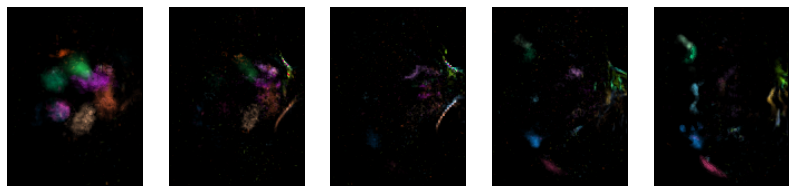

In [47]:
pylab.rcParams['figure.figsize'] = (14, 5)

if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
        plt.subplot(1,N,i+1)
        plt.imshow(Final_map[:,:,i]) 
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)

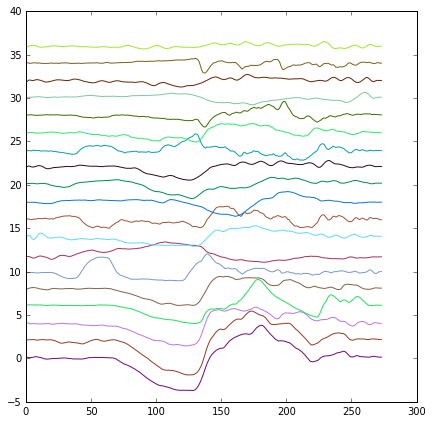

In [50]:
pylab.rcParams['figure.figsize'] = (7, 7)
h=2
i=0

for j in range(S[3]):
    if Good_ICs[j]:
        plt.plot((DT[:,j]+h*i),color=C[j,:])
        i=i+1

plt.show()

In [193]:
List1=[(Translated[i],i) for i in range(S[3])]

In [194]:
Newlist=sorted(List1, key=lambda List1: List1[0])

In [195]:
Neworder=[Newlist[i][1] for i in range(S[3])  if Newlist[i][0] != 16]

In [196]:
Neworder

[101, 1, 13, 20, 22, 41, 54, 57, 56, 62, 103, 112, 14]

In [197]:
Order[Neworder]

NameError: name 'Order' is not defined

In [198]:
[Label_ICs[Neworder[i]] for i in range(len(Neworder))]  

['OL',
 'PN',
 'PN',
 'PN',
 'AL',
 'LH',
 'PN',
 'LH',
 'FF',
 'FF',
 'PB',
 'PB',
 'AMMC']

In [199]:
NewDT=DTvar[:,Neworder[:]].T

In [200]:
NewDT.shape

(13, 8985)

In [201]:
for j in range(len(Neworder)):
    A=NewDT[:,j]
    V=np.sqrt(np.var(A))
    NewDT[:,j]=A/V

In [202]:
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)

In [203]:
S1=DT.shape
S1

(8985, 119)

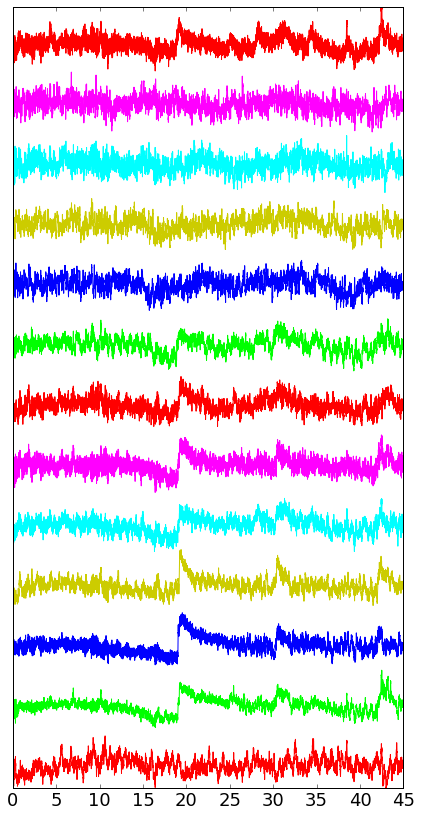

In [204]:
h=8
pylab.rcParams['figure.figsize'] = (7, 14)
i=0
t=[j*0.005 for j in range(S1[0])]

for j in range(len(Neworder)):
        plt.plot(t,NewDT[j,:]+h*j,color=C1[i%6][:])
        i=i+1
plt.ylim([-3,h*j+5])

frame1=plt.gca()
frame1.axes.get_yaxis().set_ticks([])
matplotlib.rcParams.update({'font.size': 18})
plt.show()

In [205]:
Newmaps=Dmaps[:,:,:,Neworder[:]]

In [206]:
L=len(set([Translated[Neworder[i]] for i in range(len(Neworder))]))

In [207]:
[Translated[Neworder[i]] for i in range(len(Neworder))]

[2, 5, 5, 5, 5, 5, 5, 5, 9, 9, 11, 11, 13]

In [208]:
Regionmaps=np.zeros([S[0],S[1],L,3])
Datasort=np.zeros([S[0],S[1],S[2],L,3])

In [209]:
Regionname=[]

In [210]:
Newmaps.shape

(86, 45, 10, 13)

In [211]:
Nstack

5

In [212]:
Mapsordered=datao[:,:,:,Neworder[:]]
mapfilename=filename2+'mapsordered.nii'
Mapsordered2=np.transpose(Mapsordered,(3,2,1,0))
#nimap = NiftiImage(Mapsordered2)
#nimap.save(mapfilename)

In [213]:
DMapsordered=Dmapso[:,:,:,Neworder[:]]
mapfilename=filename2+'zscoredmapsordered.nii'
DMapsordered2=np.transpose(DMapsordered,(3,2,1,0))
#nimap = NiftiImage(DMapsordered2)
#nimap.save(mapfilename)

In [214]:
j=0
i=0
k=Translated[Neworder[i]]
m=0
Regionname.append(Label_ICs[Neworder[i]])
for i in range(len(Neworder)):
    #C2=C1[i%6][:]
    for l in range(3):
        M=np.max(np.squeeze(np.reshape(Newmaps[:,:,:,i],S[0]*S[1]*S[2])))
        Regionmaps[:,:,j,l]=Regionmaps[:,:,j,l]+0.7*np.max(DMapsordered[:,:,:,i],2)*C1[i%6][l]/M
        Datasort[:,:,:,j,l]=Datasort[:,:,:,j,l]+Dmaps[:,:,:,Neworder[i]]*C1[i%6][l] 
    i=i+1
    m=m+1
    if i<len(Neworder):
        k1=Translated[Neworder[i]]
        
    if k1 != k:
        j=j+1
        k=k1
        m=0
        Regionname.append(Label_ICs[Neworder[i]])

In [215]:
Regionname

['OL', 'PN', 'FF', 'PB', 'AMMC']

In [216]:
Datasort.shape

(86, 45, 10, 5, 3)

In [217]:
DMapscolor=np.sum(Datasort, axis=3)
DMapscolor.shape

(86, 45, 10, 3)

In [218]:
mapfilename=filename2+'zscoredmapscolor.nii'
DMapscolor2=np.transpose(DMapscolor,(3,2,1,0))

In [219]:
DMapscolor2.shape

(3, 10, 45, 86)

In [220]:
nimap = NiftiImage(DMapscolor2)
nimap.save(mapfilename)

NameError: name 'NiftiImage' is not defined

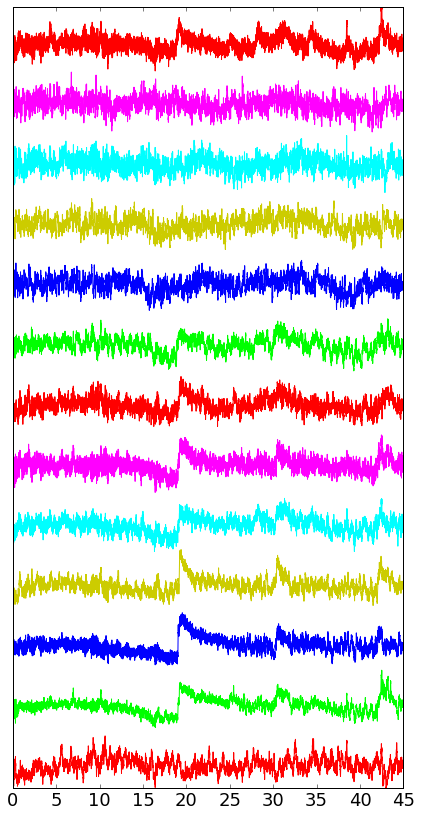

In [224]:
h=8
pylab.rcParams['figure.figsize'] = (7,14)
i=0
t=[j*0.005 for j in range(S1[0])]


for j in range(len(Neworder)):
        plt.plot(t,NewDT[j,:]+h*j,color=C1[i%6][:])
        i=i+1
plt.ylim([-3,h*j+5])

frame1=plt.gca()
frame1.axes.get_yaxis().set_ticks([])
matplotlib.rcParams.update({'font.size': 18})
plt.show()

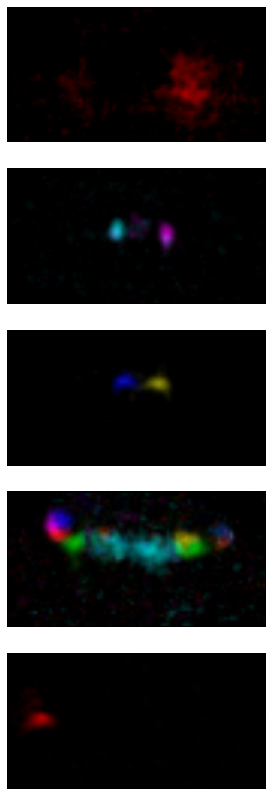

In [222]:
pylab.rcParams['figure.figsize'] = (7, 14)
import scipy
from scipy import ndimage

for i in range(L):
        plt.subplot(L,1,L-i)
        Rotated_Plot = ndimage.rotate(Regionmaps[:,:,i], -90)
        IM=plt.imshow(Rotated_Plot) 
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        

In [88]:
Sr=Regionmaps.shape
RegionmapsT=np.zeros([Sr[1],Sr[0],Sr[2],Sr[3]])
for i in range(Sr[2]):
    for j in range(Sr[3]):
        RegionmapsT[:,:,i,j]=Regionmaps[:,:,i,j].T
RegionmapsT[RegionmapsT==0]=np.nan
Dmeanproj=np.max(Dmean,2)

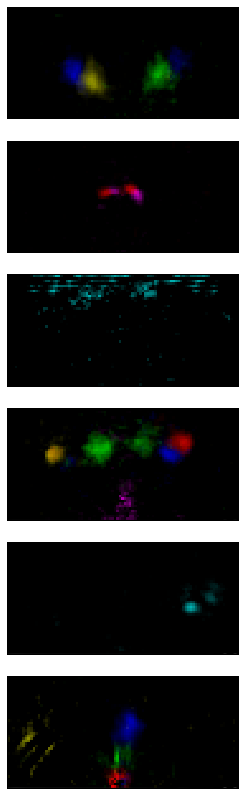

In [89]:
pylab.rcParams['figure.figsize'] = (7, 14)
import scipy
from scipy import ndimage
#from skimage import color

Dmeanprojrgb=np.dstack((Dmeanproj.T,Dmeanproj.T,Dmeanproj.T))

for i in range(L):
        plt.subplot(L,1,L-i)
        #plt.imshow(0.5*Dmeanproj.T,cmap=plt.cm.gray)
        plt.imshow(0.05*Dmeanprojrgb)
        plt.imshow(np.squeeze(RegionmapsT[:,:,i]),interpolation='none')
        #Rotated_Plot = ndimage.rotate(Regionmaps[:,:,i], -90)
        #IM=plt.imshow(Rotated_Plot)
        #Rotated_Plot2= plt.imshow(mp.max(Dmean,3),cmap=plt.cm.gray)
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)

In [92]:
foldername='/media/sophie2/100115'

In [93]:
import scipy.io as sio
sio.savemat(foldername+'NewDT.mat',{'NewDT':NewDT})

In [94]:
names=set([Label_ICs[Neworder[i]] for i in range(len(Neworder))])  
for i in range(L):
    regionfilename=foldername+Regionname[i]+'.nii'
    D3=np.transpose(Datasort[:,:,:,i,:],(2,3,1,0))
    nim = NiftiImage(D3)
    nim.save(regionfilename)

NameError: name 'NiftiImage' is not defined

In [234]:
%notebook -e 862_150.ipynb

In [ ]:
%store